In [ ]:
# Insert necessary libraries
import pandas as pd
from google.colab import drive
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, SimpleRNN, Conv1D
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.layers import SpatialDropout1D
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/IoT_Intrusion.csv'

# Load the data and make a dataframe
intrusion_df = pd.read_csv(file_path)

# Display the first 10 values
print(intrusion_df.head(10))

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   
5       0.000000           0.00          47.00     64.00     1.954123   
6       1.052463         108.00           6.00     64.00     1.902353   
7       0.142555        2322.79           6.66     79.77   493.283636   
8       0.002135         192.52          16.89     65.73    16.883240   
9       0.000000          54.20           6.00     64.00    11.243547   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0                1                0                1  ...   
1     4.290556    0.0             

In [ ]:
# Check the dimension of the DataFrame
print("Shape of the DataFrame:")
print(intrusion_df.shape)

# List the column names
print("\nColumn names:")
print(intrusion_df.columns.tolist())

# Get detailed info about the DataFrame
print("\nDataFrame info:")
intrusion_df.info()

Shape of the DataFrame:
(1048575, 47)

Column names:
['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64

In [ ]:
# Check for missing values
print("Null values in each column:")
print(intrusion_df.isnull().sum())

# Check for duplicate values
print("\nNumber of duplicate rows:")
print(intrusion_df.duplicated().sum())

Null values in each column:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label 

In [ ]:
# Check for outliers using the IQR method for numerical columns
print("\nOutlier detection using IQR method:")
numeric_cols = intrusion_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = intrusion_df[col].quantile(0.25)
    Q3 = intrusion_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = intrusion_df[(intrusion_df[col] < (Q1 - 1.5 * IQR)) | (intrusion_df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers")


Outlier detection using IQR method:
flow_duration: 197296 outliers
Header_Length: 257803 outliers
Protocol Type: 38682 outliers
Duration: 278566 outliers
Rate: 230651 outliers
Srate: 230651 outliers
Drate: 60 outliers
fin_flag_number: 90763 outliers
syn_flag_number: 217379 outliers
rst_flag_number: 94971 outliers
psh_flag_number: 92382 outliers
ack_flag_number: 129867 outliers
ece_flag_number: 0 outliers
cwr_flag_number: 0 outliers
ack_count: 129843 outliers
syn_count: 251313 outliers
fin_count: 139006 outliers
urg_count: 215103 outliers
rst_count: 236011 outliers
HTTP: 50840 outliers
HTTPS: 57942 outliers
DNS: 142 outliers
Telnet: 0 outliers
SMTP: 0 outliers
SSH: 63 outliers
IRC: 0 outliers
TCP: 0 outliers
UDP: 222226 outliers
DHCP: 2 outliers
ARP: 70 outliers
ICMP: 171268 outliers
IPv: 119 outliers
LLC: 119 outliers
Tot sum: 320522 outliers
Min: 300600 outliers
Max: 334942 outliers
AVG: 322032 outliers
Std: 214765 outliers
Tot size: 321923 outliers
IAT: 62951 outliers
Number: 44686 

In [ ]:
# Remove duplicate rows
intrusion_df = intrusion_df.drop_duplicates()
print(intrusion_df.shape)

(983019, 47)


In [ ]:
intrusion_df["label"].unique()   # Check types of intrusions

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [ ]:
# Define the mapping of attack types to categories
attack_mapping = {
    # Denial of Service (DoS) Attacks
    'DoS-TCP_Flood': 'DoS Attack',
    'DoS-UDP_Flood': 'DoS Attack',
    'DoS-SYN_Flood': 'DoS Attack',
    'DoS-HTTP_Flood': 'DoS Attack',

    # Distributed Denial of Service (DDoS) Attacks
    'DDoS-RSTFINFlood': 'DDoS Attack',
    'DDoS-ICMP_Flood': 'DDoS Attack',
    'DDoS-SynonymousIP_Flood': 'DDoS Attack',
    'DDoS-SYN_Flood': 'DDoS Attack',
    'DDoS-PSHACK_Flood': 'DDoS Attack',
    'DDoS-TCP_Flood': 'DDoS Attack',
    'DDoS-UDP_Flood': 'DDoS Attack',
    'DDoS-ACK_Fragmentation': 'DDoS Attack',
    'DDoS-ICMP_Fragmentation': 'DDoS Attack',
    'DDoS-UDP_Fragmentation': 'DDoS Attack',
    'DDoS-HTTP_Flood': 'DDoS Attack',
    'DDoS-SlowLoris': 'DDoS Attack',

    # Mirai Botnet Attacks
    'Mirai-greeth_flood': 'Mirai Botnet Attack',
    'Mirai-udpplain': 'Mirai Botnet Attack',
    'Mirai-greip_flood': 'Mirai Botnet Attack',

    # Reconnaissance Attacks
    'Recon-PortScan': 'Reconnaissance Attack',
    'Recon-OSScan': 'Reconnaissance Attack',
    'Recon-HostDiscovery': 'Reconnaissance Attack',
    'Recon-PingSweep': 'Reconnaissance Attack',

    # Injection Attacks
    'SqlInjection': 'Injection Attack',
    'CommandInjection': 'Injection Attack',

    # Web Application Attacks
    'XSS': 'Web Application Attack',
    'Uploading_Attack': 'Web Application Attack',

    # Malware & Exploit-Based Attacks
    'Backdoor_Malware': 'Malware & Exploit-Based Attack',
    'BrowserHijacking': 'Malware & Exploit-Based Attack',

}

# Replace the 'label' column with the specific attack types
intrusion_df['label'] = intrusion_df['label'].replace(attack_mapping)

# Check the unique values in the updated dataset
print("Updated unique labels:")
print(intrusion_df['label'].unique())

Updated unique labels:
['DDoS Attack' 'DoS Attack' 'Mirai Botnet Attack' 'BenignTraffic'
 'MITM-ArpSpoofing' 'Reconnaissance Attack' 'DNS_Spoofing'
 'Web Application Attack' 'Injection Attack' 'VulnerabilityScan'
 'Malware & Exploit-Based Attack' 'DictionaryBruteForce']


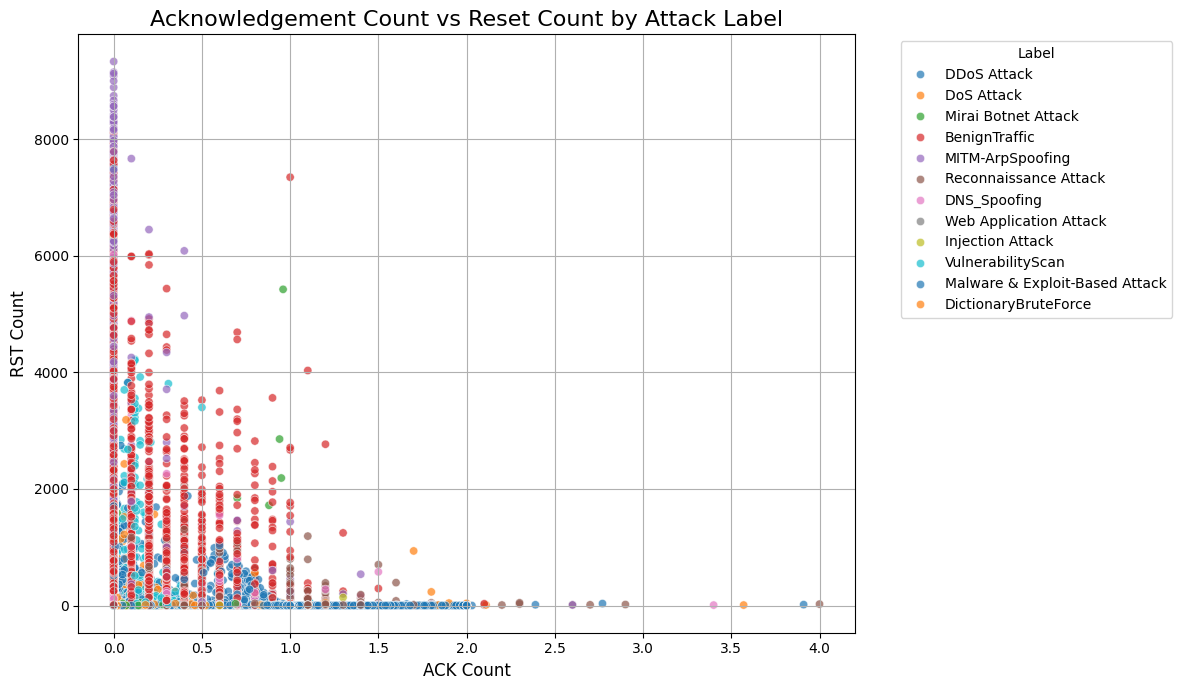

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(data=intrusion_df, x='ack_count', y='rst_count', hue='label', palette='tab10', alpha=0.7)

# Customize the chart
plt.title('Acknowledgement Count vs Reset Count by Attack Label', fontsize=16)
plt.xlabel('ACK Count', fontsize=12)
plt.ylabel('RST Count', fontsize=12)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

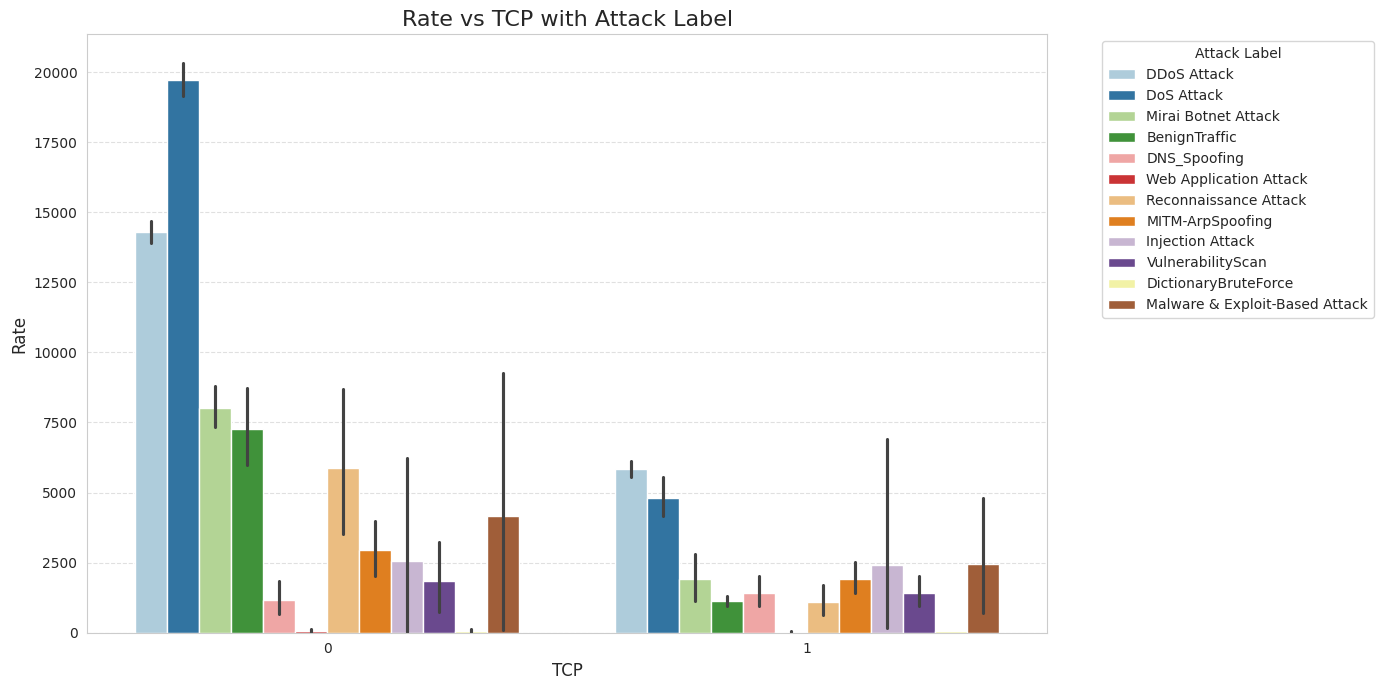

In [ ]:
# Set plot style
plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')

# Create the bar plot
sns.barplot(data=intrusion_df, x='TCP', y='Rate', hue='label', palette='Paired')

# Customize the chart
plt.title('Rate vs TCP with Attack Label', fontsize=16)
plt.xlabel('TCP', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.legend(title='Attack Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding directly to the 'label' column
intrusion_df['label'] = label_encoder.fit_transform(intrusion_df['label'])

# Verify the unique encoded labels
print("Encoded labels:")
print(intrusion_df['label'].unique())

Encoded labels:
[ 1  4  8  0  6  9  2 11  5 10  7  3]


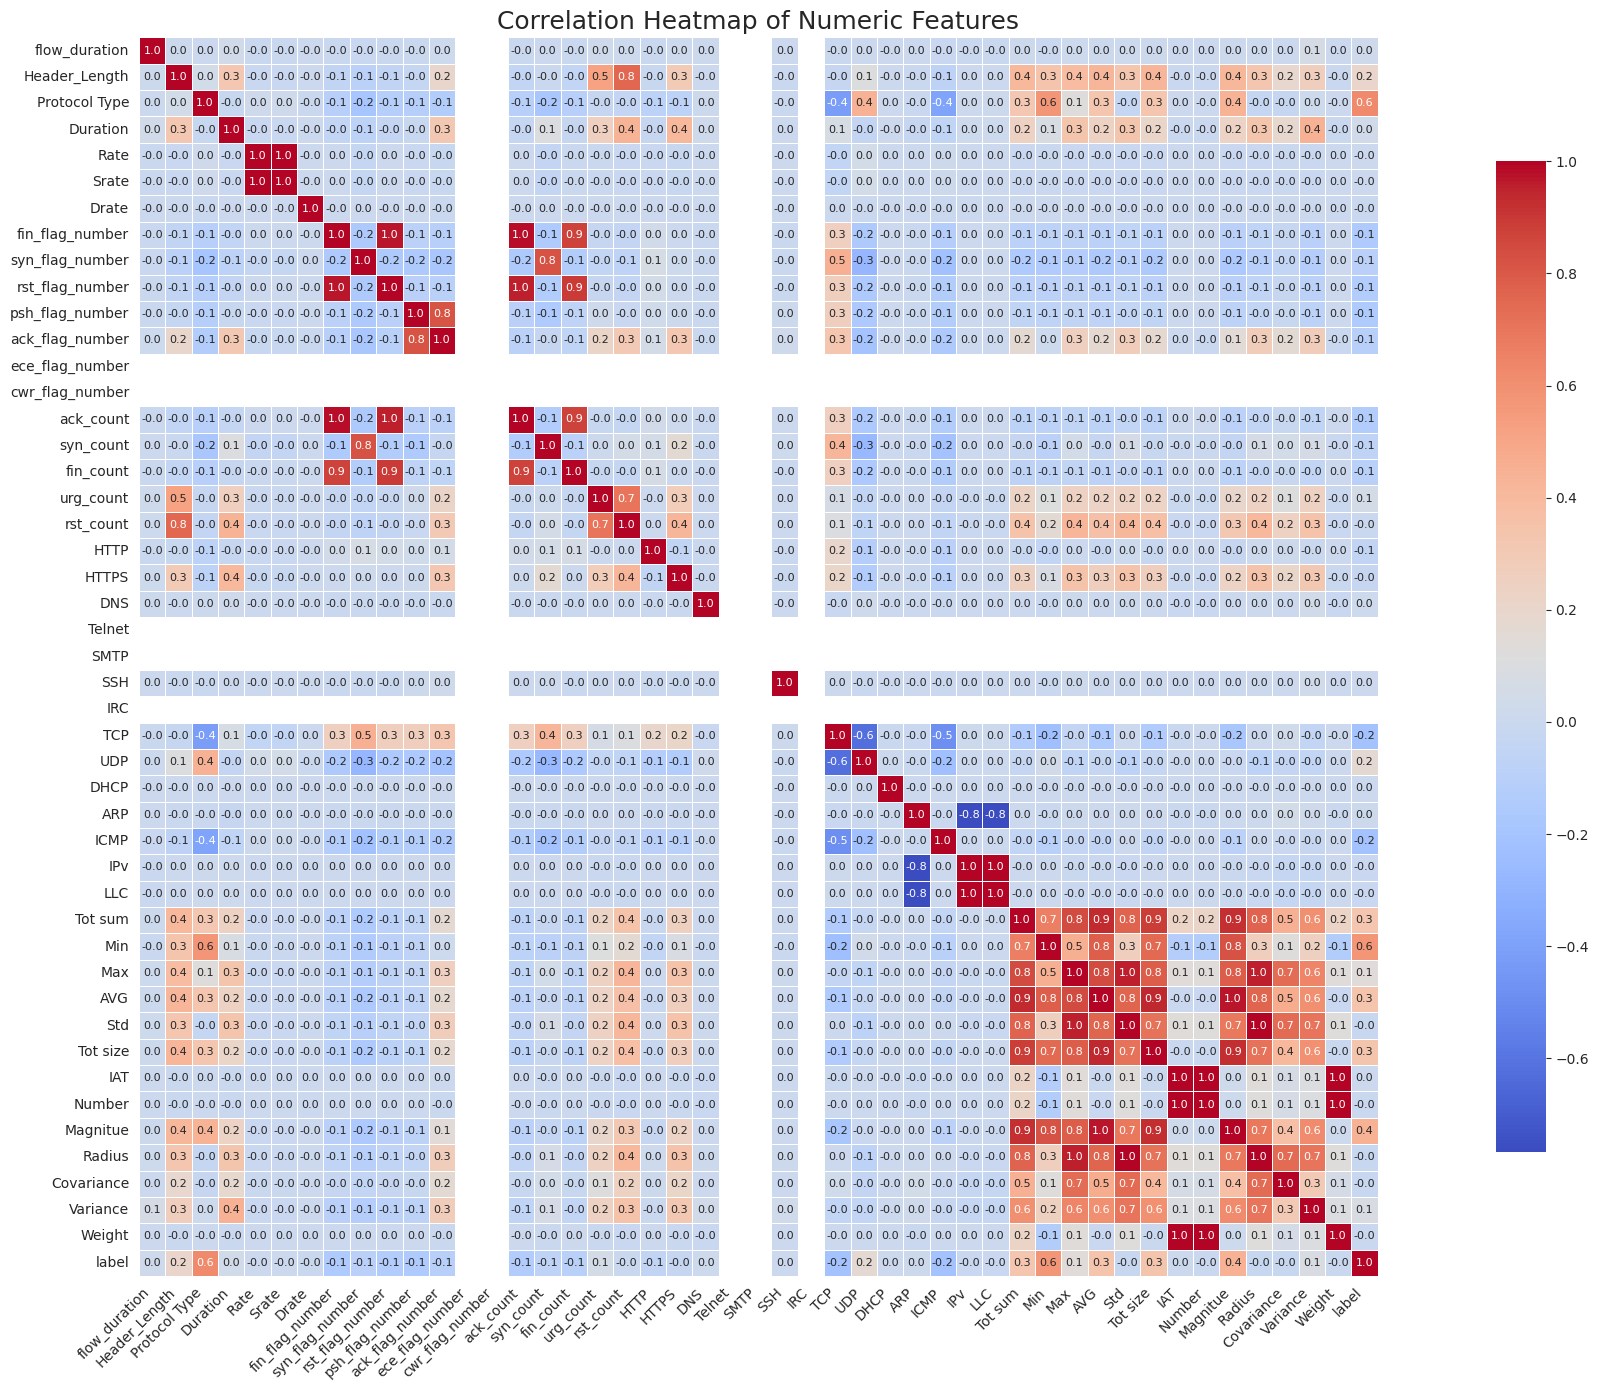

In [ ]:
# Select the columns
numeric_df = intrusion_df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set plot size and style
plt.figure(figsize=(24, 14))
sns.set_style("white")

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5,
    annot_kws={"size": 8}
)

# Customize the plot
plt.title("Correlation Heatmap of Numeric Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Separate input features and predictor variable
X = intrusion_df.drop(['label', 'ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC'], axis=1).values
y = intrusion_df['label'].values

In [ ]:
# Splitting features in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the train-test split datasets
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

Training data shape: (688113, 41)
Testing data shape: (294906, 41)


In [ ]:
# Define the CNN model
cnn_model = Sequential()

# Input layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(41, 1)))  # Conv1D works on sequences of data
cnn_model.add(MaxPooling1D(pool_size=2))  # Max pooling layer

# Adding additional convolutional layers
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Add dropout for regularization
cnn_model.add(Dropout(0.2))

# Flatten the output of the convolutional layers
cnn_model.add(Flatten())

# Fully connected layer (Dense layer)
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.3))

# Output layer
cnn_model.add(Dense(12, activation='softmax'))

# Compile the model with Adam optimizer
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 39, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,444 (1.11 MB)

 Trainable params: 290,444 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the CNN model on the training set
cnn_model_fitting = cnn_model.fit(
    X_train_scaled,   # Training features
    y_train,          # Training labels
    epochs=5,        # Number of epochs
    batch_size=32,    # Batch size
    validation_data=(X_test_scaled, y_test),  # Validation data
    verbose=1         # Display progress
)

Epoch 1/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 109s 5ms/step - accuracy: 0.8709 - loss: 0.3001 - val_accuracy: 0.9848 - val_loss: 0.0468
Epoch 2/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 0.9848 - val_loss: 0.0438
Epoch 3/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9834 - loss: 0.0506 - val_accuracy: 0.9844 - val_loss: 0.0459
Epoch 4/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9834 - loss: 0.0505 - val_accuracy: 0.9856 - val_loss: 0.0425
Epoch 5/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9834 - loss: 0.0525 - val_accuracy: 0.9845 - val_loss: 0.0435


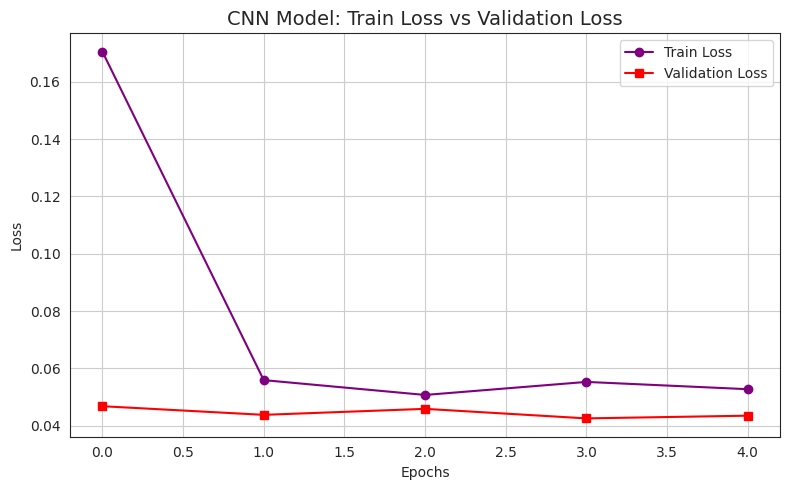

In [ ]:
# Plotting Train vs Validation Loss for CNN Model
plt.figure(figsize=(8, 5))
plt.plot(cnn_model_fitting.history['loss'], label='Train Loss', color='purple', marker='o')
plt.plot(cnn_model_fitting.history['val_loss'], label='Validation Loss', color='red', marker='s')
plt.title('CNN Model: Train Loss vs Validation Loss', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

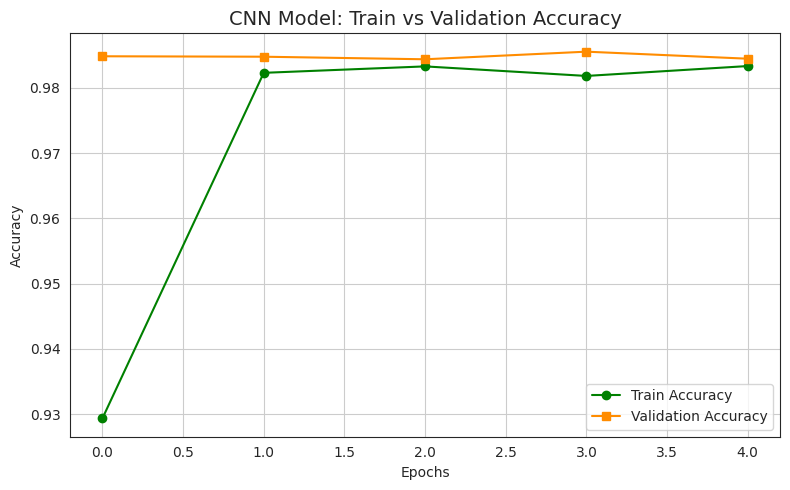

In [ ]:
# Plotting Train vs Validation Accuracy for CNN Model
plt.figure(figsize=(8, 5))
plt.plot(cnn_model_fitting.history['accuracy'], label='Train Accuracy', color='green', marker='o')
plt.plot(cnn_model_fitting.history['val_accuracy'], label='Validation Accuracy', color='darkorange', marker='s')
plt.title('CNN Model: Train vs Validation Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, cnn_accuracy = cnn_model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the accuracy score
print("Test Accuracy Score:", cnn_accuracy)

Test Accuracy Score: 0.9844729900360107


In [ ]:
# Predict class probabilities
cnn_pred_probs = cnn_model.predict(X_test_scaled)

# Convert predicted probabilities to class labels
cnn_pred = np.argmax(cnn_pred_probs, axis=1)

# Generate the classification report
print("Classification Report (CNN):\n")
print(classification_report(y_test, cnn_pred))

9216/9216 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
Classification Report (CNN):

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      7325
           1       1.00      1.00      1.00    210670
           2       0.52      0.18      0.27      1213
           3       0.00      0.00      0.00        92
           4       1.00      0.99      0.99     53287
           5       0.00      0.00      0.00        70
           6       0.76      0.44      0.56      2111
           7       0.00      0.00      0.00        74
           8       1.00      0.99      1.00     17579
           9       0.85      0.46      0.60      2203
          10       0.89      0.54      0.67       257
          11       0.00      0.00      0.00        25

    accuracy                           0.98    294906
   macro avg       0.56      0.47      0.49    294906
weighted avg       0.98      0.98      0.98    294906



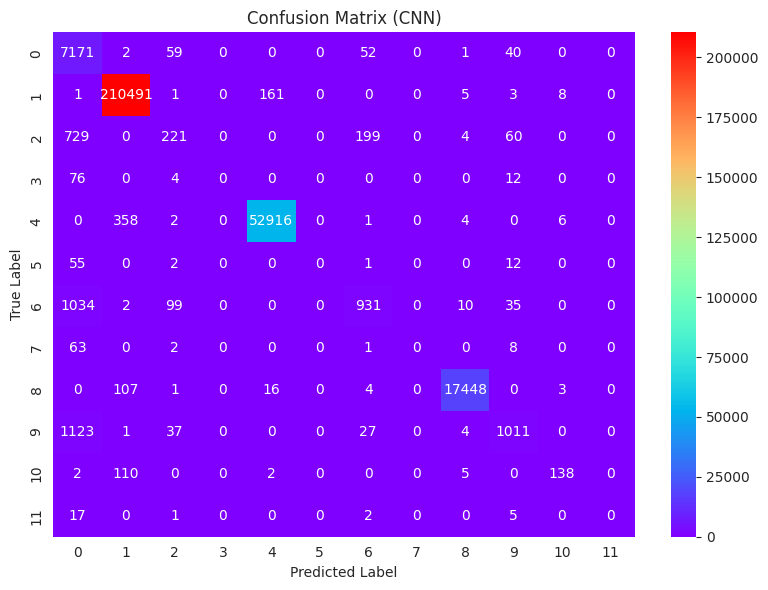

In [ ]:
# Generate the confusion matrix
cnn_cm = confusion_matrix(y_test, cnn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="rainbow")
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
# Build the LSTM Model
lstm_model = Sequential()

# LSTM layer
lstm_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1), dropout=0.2))
lstm_model.add(BatchNormalization())

# Add more LSTM layers for deeper learning
lstm_model.add(LSTM(units=128, return_sequences=True, dropout=0.2))
lstm_model.add(BatchNormalization())

# Add more LSTM layers (optional)
lstm_model.add(LSTM(units=128, return_sequences=False, dropout=0.2))
lstm_model.add(BatchNormalization())

# Dense layer
lstm_model.add(Dense(units=64, activation='relu'))

# Output layer
lstm_model.add(Dense(units=len(np.unique(y)), activation='softmax'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 41, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 41, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,300 (1.30 MB)

 Trainable params: 339,532 (1.30 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Reshape the data to 3D for LSTM input
X_train_scaled_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Fit the model on the training data
lstm_model_fitting = lstm_model.fit(X_train_scaled_reshaped, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_test_scaled_reshaped, y_test),
                    verbose=1)

Epoch 1/5
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 180s 16ms/step - accuracy: 0.7993 - loss: 0.5098 - val_accuracy: 0.9622 - val_loss: 0.1071
Epoch 2/5
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 200s 16ms/step - accuracy: 0.9249 - loss: 0.2356 - val_accuracy: 0.9814 - val_loss: 0.0538
Epoch 3/5
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 201s 16ms/step - accuracy: 0.9292 - loss: 0.2235 - val_accuracy: 0.9838 - val_loss: 0.0461
Epoch 4/5
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 203s 16ms/step - accuracy: 0.9296 - loss: 0.2213 - val_accuracy: 0.9832 - val_loss: 0.0466
Epoch 5/5
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 219s 18ms/step - accuracy: 0.9297 - loss: 0.2209 - val_accuracy: 0.9848 - val_loss: 0.0436


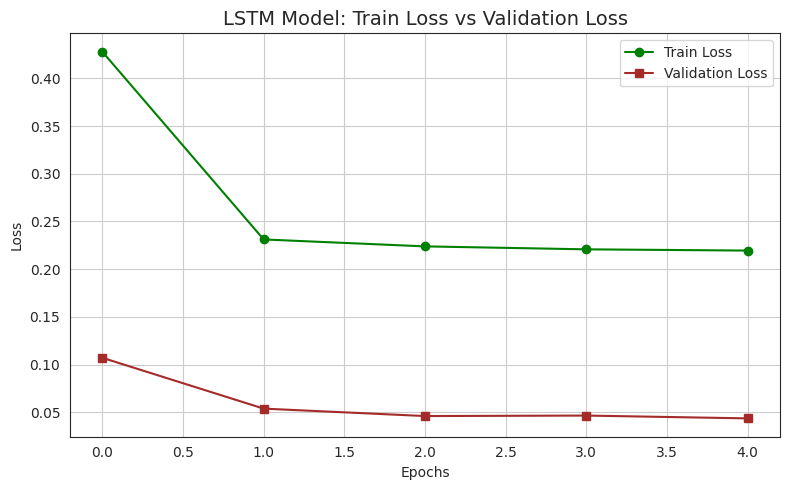

In [ ]:
# Plotting Train vs Validation Loss for LSTM Model
plt.figure(figsize=(8, 5))
plt.plot(lstm_model_fitting.history['loss'], label='Train Loss', color='green', marker='o')
plt.plot(lstm_model_fitting.history['val_loss'], label='Validation Loss', color='brown', marker='s')
plt.title('LSTM Model: Train Loss vs Validation Loss', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

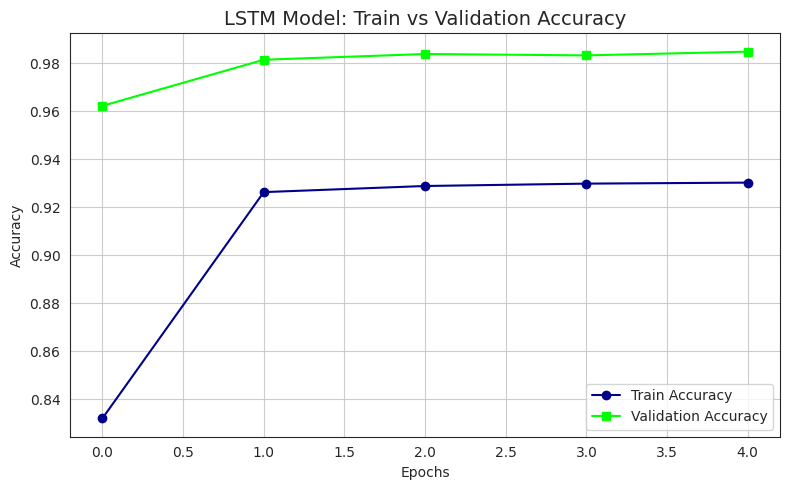

In [ ]:
# Plotting Train vs Validation Accuracy for LSTM Model
plt.figure(figsize=(8, 5))
plt.plot(lstm_model_fitting.history['accuracy'], label='Train Accuracy', color='darkblue', marker='o')
plt.plot(lstm_model_fitting.history['val_accuracy'], label='Validation Accuracy', color='lime', marker='s')
plt.title('LSTM Model: Train vs Validation Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, lstm_accuracy = lstm_model.evaluate(X_test_scaled_reshaped, y_test, verbose=0)

# Print the accuracy score
print("Test Accuracy Score (LSTM):", lstm_accuracy)

Test Accuracy Score (LSTM): 0.9847849607467651


In [ ]:
# Predict class probabilities
lstm_pred_probs = lstm_model.predict(X_test_scaled_reshaped)

# Convert predicted probabilities to class labels
lstm_pred = np.argmax(lstm_pred_probs, axis=1)

# Generate the classification report
print("Classification Report (LSTM):\n")
print(classification_report(y_test, lstm_pred))

9216/9216 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step
Classification Report (LSTM):

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      7325
           1       1.00      1.00      1.00    210670
           2       0.49      0.22      0.31      1213
           3       1.00      0.13      0.23        92
           4       0.99      0.99      0.99     53287
           5       0.00      0.00      0.00        70
           6       0.83      0.49      0.62      2111
           7       0.00      0.00      0.00        74
           8       1.00      0.99      0.99     17579
           9       0.74      0.55      0.63      2203
          10       0.86      0.49      0.62       257
          11       0.00      0.00      0.00        25

    accuracy                           0.98    294906
   macro avg       0.64      0.49      0.52    294906
weighted avg       0.98      0.98      0.98    294906



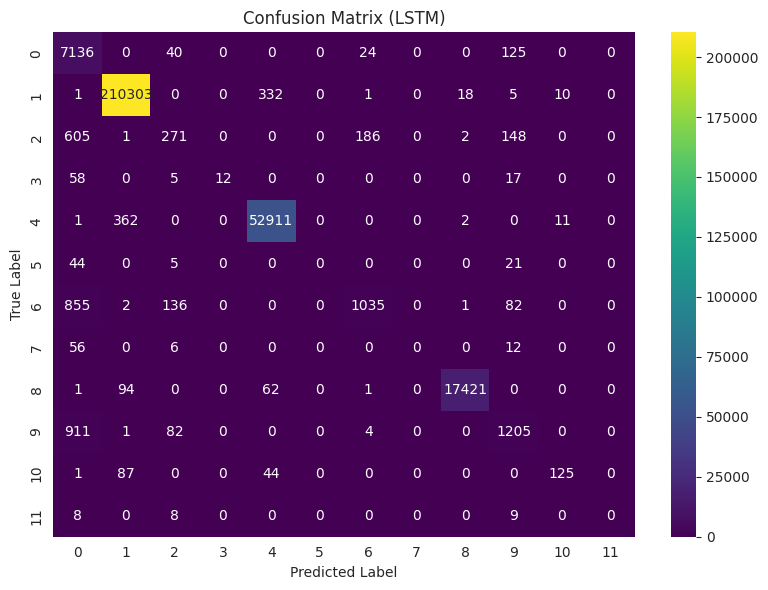

In [ ]:
# Generate the confusion matrix
lstm_cm = confusion_matrix(y_test, lstm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
# Define the 2D RNN model
rnn_model = Sequential()

# Input layer
rnn_model.add(LSTM(128, input_shape=(41, 1), return_sequences=True))  # LSTM layer with 128 units and output sequence
rnn_model.add(Dropout(0.2))  # Dropout for regularization

# Additional LSTM layer
rnn_model.add(LSTM(64, return_sequences=True))  # Another LSTM layer with 64 units
rnn_model.add(Dropout(0.2))  # Dropout for regularization

# Add a BatchNormalization layer
rnn_model.add(BatchNormalization())

# Flatten the output for fully connected layers
rnn_model.add(Flatten())

# Dense layer for processing the learned features
rnn_model.add(Dense(256, activation='relu'))
rnn_model.add(Dropout(0.3))  # Dropout for regularization

# Output layer
rnn_model.add(Dense(12, activation='softmax'))

# Compile the model with Adam optimizer
rnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 41, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 41, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 41, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       672,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791,308 (3.02 MB)

 Trainable params: 791,180 (3.02 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
# Fit the RNN model on the training set
rnn_model_fitting = rnn_model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 253s 12ms/step - accuracy: 0.8228 - loss: 0.3863 - val_accuracy: 0.8593 - val_loss: 0.3180
Epoch 2/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 260s 12ms/step - accuracy: 0.8674 - loss: 0.3067 - val_accuracy: 0.9644 - val_loss: 0.1158
Epoch 3/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 260s 12ms/step - accuracy: 0.9612 - loss: 0.1072 - val_accuracy: 0.9824 - val_loss: 0.0481
Epoch 4/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 259s 11ms/step - accuracy: 0.9771 - loss: 0.0627 - val_accuracy: 0.9856 - val_loss: 0.0407
Epoch 5/5
21504/21504 ━━━━━━━━━━━━━━━━━━━━ 265s 12ms/step - accuracy: 0.9830 - loss: 0.0483 - val_accuracy: 0.9855 - val_loss: 0.0409


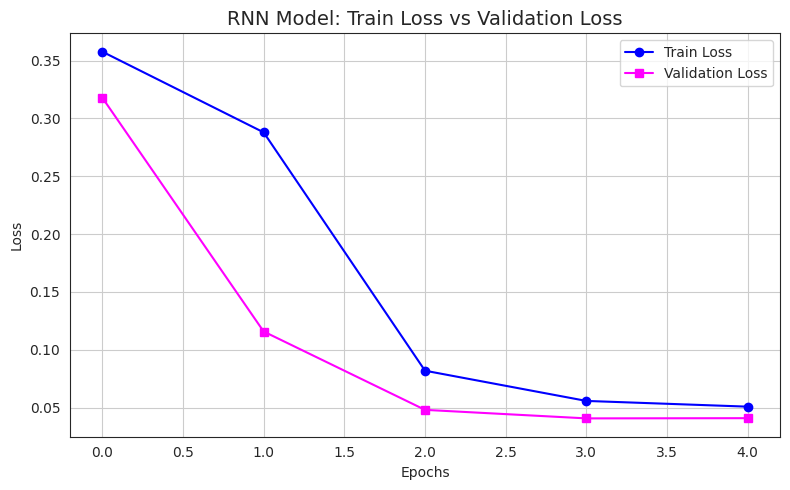

In [ ]:
# Plotting Train vs Validation Loss for RNN Model
plt.figure(figsize=(8, 5))
plt.plot(rnn_model_fitting.history['loss'], label='Train Loss', color='blue', marker='o')
plt.plot(rnn_model_fitting.history['val_loss'], label='Validation Loss', color='magenta', marker='s')
plt.title('RNN Model: Train Loss vs Validation Loss', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

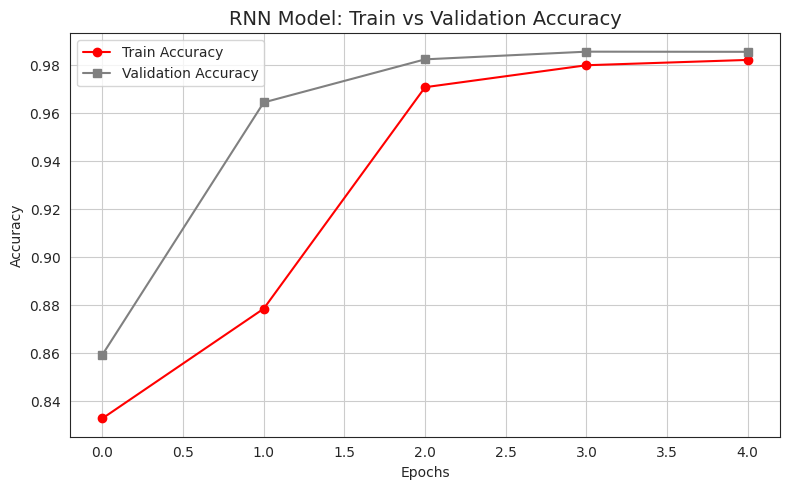

In [ ]:
# Plotting Train vs Validation Accuracy for RNN Model
plt.figure(figsize=(8, 5))
plt.plot(rnn_model_fitting.history['accuracy'], label='Train Accuracy', color='red', marker='o')
plt.plot(rnn_model_fitting.history['val_accuracy'], label='Validation Accuracy', color='gray', marker='s')
plt.title('RNN Model: Train vs Validation Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, rnn_accuracy = rnn_model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the accuracy score
print("Test Accuracy Score (RNN):", rnn_accuracy)

Test Accuracy Score (RNN): 0.9855208396911621


In [45]:
# Predict class probabilities
rnn_pred_probs = rnn_model.predict(X_test_scaled)

# Convert predicted probabilities to class labels
rnn_pred = np.argmax(rnn_pred_probs, axis=1)

# Generate the classification report
print("Classification Report (RNN):\n")
print(classification_report(y_test, rnn_pred))

9216/9216 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step
Classification Report (RNN):

              precision    recall  f1-score   support

           0       0.76      0.97      0.86      7325
           1       1.00      1.00      1.00    210670
           2       0.75      0.15      0.25      1213
           3       1.00      0.17      0.30        92
           4       1.00      0.99      0.99     53287
           5       0.00      0.00      0.00        70
           6       0.84      0.58      0.69      2111
           7       0.00      0.00      0.00        74
           8       1.00      0.99      1.00     17579
           9       0.69      0.65      0.67      2203
          10       0.91      0.57      0.70       257
          11       0.00      0.00      0.00        25

    accuracy                           0.99    294906
   macro avg       0.66      0.51      0.54    294906
weighted avg       0.99      0.99      0.98    294906



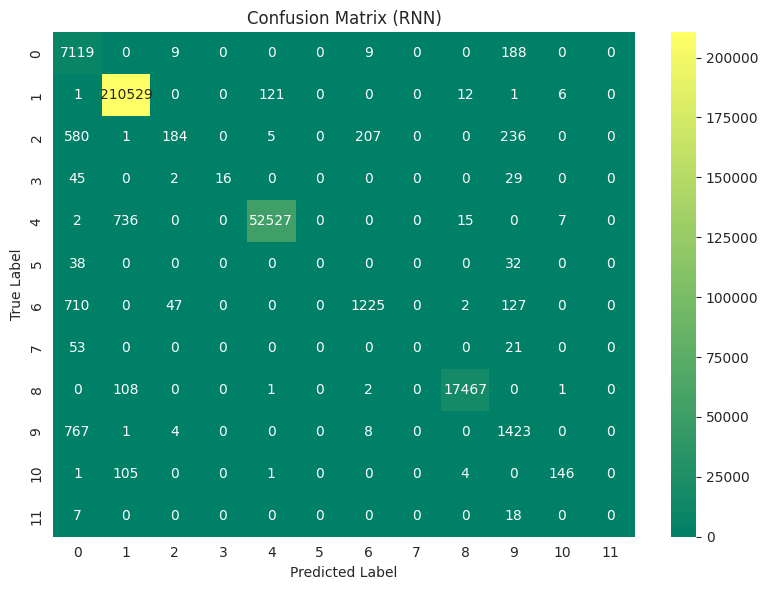

In [46]:
# Generate the confusion matrix
rnn_cm = confusion_matrix(y_test, rnn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_cm, annot=True, fmt="d", cmap="summer")
plt.title("Confusion Matrix (RNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

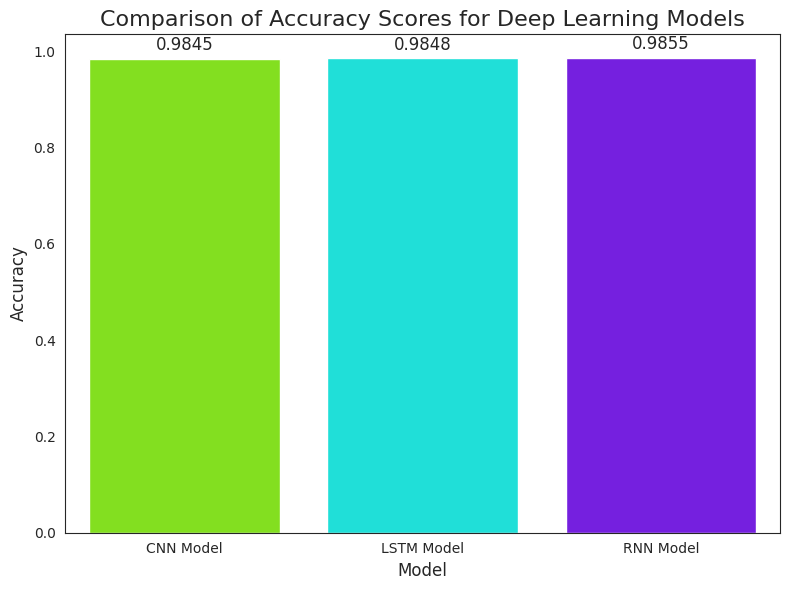

In [47]:
# Define model names and their corresponding accuracy scores
model_names = ['CNN Model', 'LSTM Model', 'RNN Model']
accuracy_scores = [cnn_accuracy, lstm_accuracy, rnn_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores, hue=model_names, palette='hsv', legend=False)

# Display the accuracy scores
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Comparison of Accuracy Scores for Deep Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

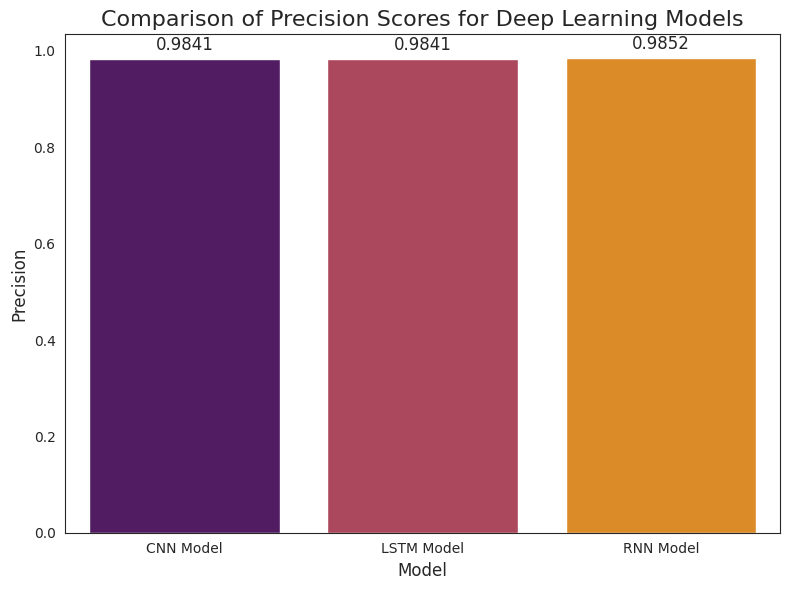

In [48]:
# Create the precision score of the models
cnn_precision = precision_score(y_test, cnn_pred, average='weighted', zero_division=0)
lstm_precision = precision_score(y_test, lstm_pred, average='weighted', zero_division=0)
rnn_precision = precision_score(y_test, rnn_pred, average='weighted', zero_division=0)

# Define model names and their corresponding precision scores
model_names = ['CNN Model', 'LSTM Model', 'RNN Model']
precision_scores = [cnn_precision, lstm_precision, rnn_precision]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=precision_scores, palette='inferno')

# Display the precision scores on top of the bars
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Comparison of Precision Scores for Deep Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

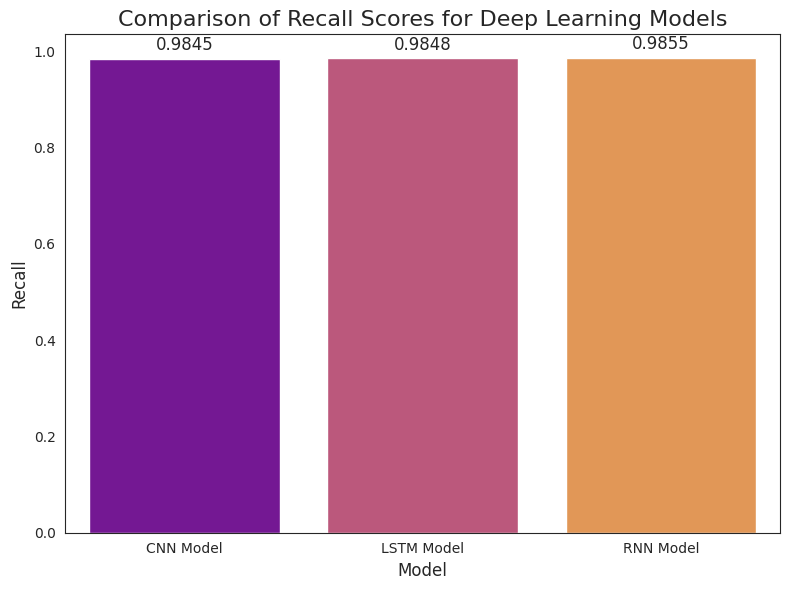

In [49]:
# Create the recall score of the models
cnn_recall = recall_score(y_test, cnn_pred, average='weighted', zero_division=0)
lstm_recall = recall_score(y_test, lstm_pred, average='weighted', zero_division=0)
rnn_recall = recall_score(y_test, rnn_pred, average='weighted', zero_division=0)

# Define model names and their corresponding recall scores
model_names = ['CNN Model', 'LSTM Model', 'RNN Model']
recall_scores = [cnn_recall, lstm_recall, rnn_recall]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=recall_scores, palette='plasma')

# Display the recall scores on top of the bars
for i, score in enumerate(recall_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Comparison of Recall Scores for Deep Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

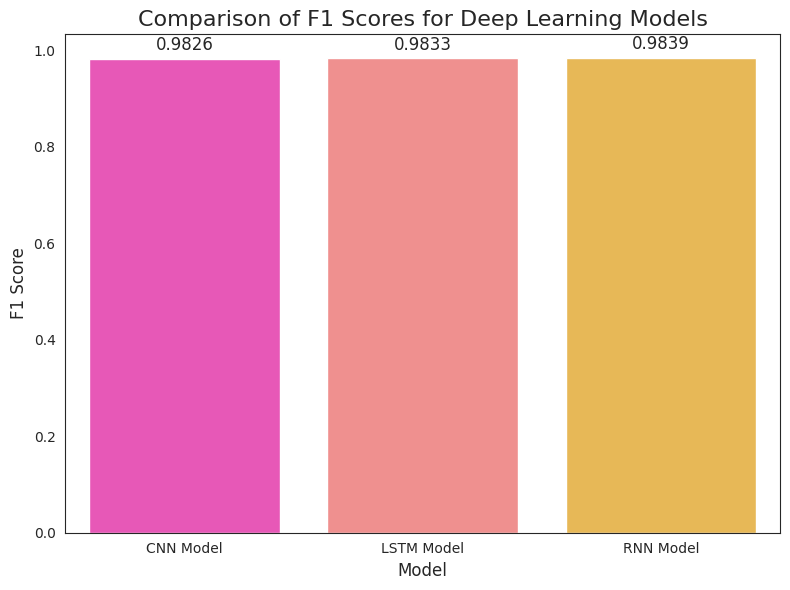

In [51]:
# Create the F1 score of the models
cnn_f1 = f1_score(y_test, cnn_pred, average='weighted', zero_division=0)
lstm_f1 = f1_score(y_test, lstm_pred, average='weighted', zero_division=0)
rnn_f1 = f1_score(y_test, rnn_pred, average='weighted', zero_division=0)

# Define model names and their corresponding f1 scores
model_names = ['CNN Model', 'LSTM Model', 'RNN Model']
f1_scores = [cnn_f1, lstm_f1, rnn_f1]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=f1_scores, palette='spring')

# Display the f1 scores on top of the bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Comparison of F1 Scores for Deep Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

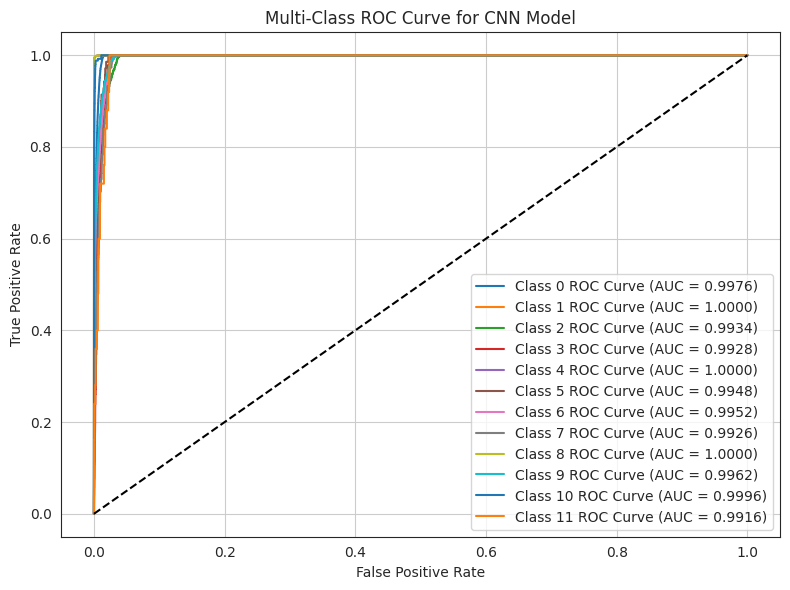

In [52]:
# Binarize the labels for multi-class ROC computation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
cnn_pred_bin = cnn_pred_probs

# Calculate ROC curve for each class
n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], cnn_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], cnn_pred_bin[:, i])

# Plot the ROC curve for CNN
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC Curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('Multi-Class ROC Curve for CNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

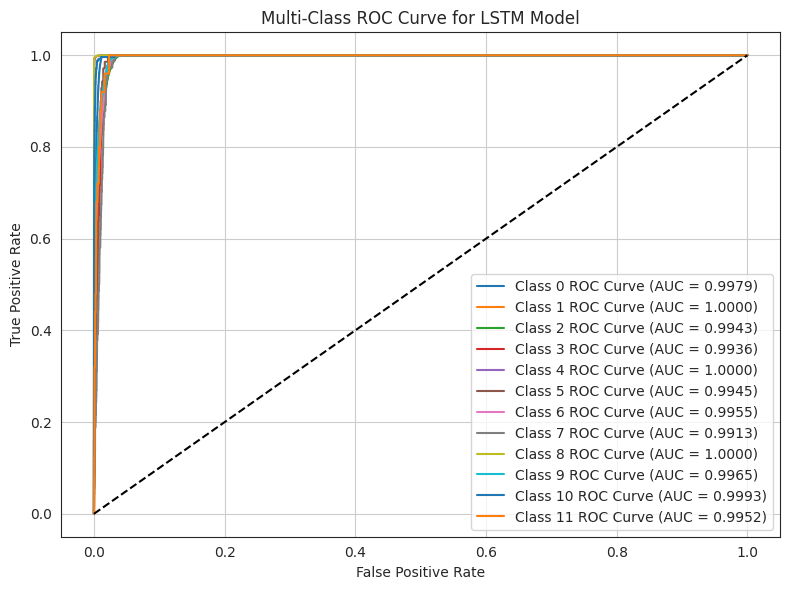

In [53]:
# Calculate ROC curve for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lstm_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], lstm_pred_probs[:, i])

# Plot the ROC curve for LSTM
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC Curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('Multi-Class ROC Curve for LSTM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

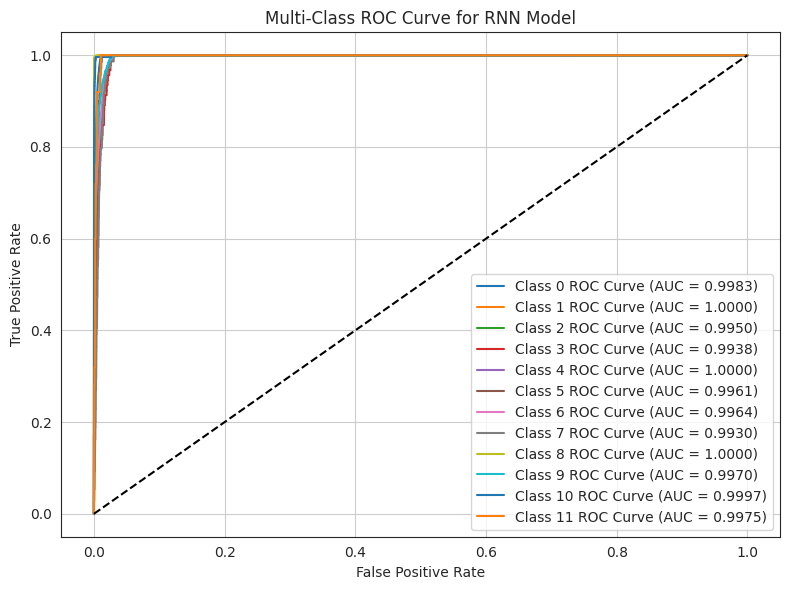

In [54]:
# Calculate ROC curve for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rnn_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], rnn_pred_probs[:, i])

# Plot the ROC curve for RNN
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC Curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('Multi-Class ROC Curve for RNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Calculate precision, recall, f1 score and AUC for CNN model
cnn_precision = precision_score(y_test, cnn_pred, average='weighted')
cnn_recall = recall_score(y_test, cnn_pred, average='weighted')
cnn_f1 = f1_score(y_test, cnn_pred, average='weighted')
cnn_auc = roc_auc_score(y_test, cnn_pred_probs, multi_class='ovr')

# Calculate precision, recall, f1 score and AUC for LSTM model
lstm_precision = precision_score(y_test, lstm_pred, average='weighted')
lstm_recall = recall_score(y_test, lstm_pred, average='weighted')
lstm_f1 = f1_score(y_test, lstm_pred, average='weighted')
lstm_auc = roc_auc_score(y_test, lstm_pred_probs, multi_class='ovr')

# Calculate precision, recall, f1 score and AUC for RNN model
rnn_precision = precision_score(y_test, rnn_pred, average='weighted')
rnn_recall = recall_score(y_test, rnn_pred, average='weighted')
rnn_f1 = f1_score(y_test, rnn_pred, average='weighted')
rnn_auc = roc_auc_score(y_test, rnn_pred_probs, multi_class='ovr')

# Create a DataFrame to display the results
model_comparison = pd.DataFrame({
    'Models': ['CNN', 'LSTM', 'RNN'],
    'Accuracy Score': [cnn_accuracy, lstm_accuracy, rnn_accuracy],
    'Precision Score': [cnn_precision, lstm_precision, rnn_precision],
    'Recall Score': [cnn_recall, lstm_recall, rnn_recall],
    'F1 Score': [cnn_f1, lstm_f1, rnn_f1],
    'AUC Score': [cnn_auc, lstm_auc, rnn_auc]
})

# Display the comparison table
print(model_comparison)

  Models  Accuracy Score  Precision Score  Recall Score  F1 Score  AUC Score
0    CNN        0.984473         0.984055      0.984473  0.982562   0.996137
1   LSTM        0.984785         0.984103      0.984785  0.983264   0.996515
2    RNN        0.985521         0.985216      0.985521  0.983931   0.997226


In [56]:
# Save models in the native Keras format
cnn_model.save('cnn_model.keras')
lstm_model.save('lstm_model.keras')
rnn_model.save('rnn_model.keras')

# Save the scaler
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [69]:
# Load the pre-trained deep learning models and scaler
cnn_model = load_model('cnn_model.keras')
lstm_model = load_model('lstm_model.keras')
rnn_model = load_model('rnn_model.keras')
scaler = joblib.load('scaler.save')

# Define min and max values for the features
feature_ranges = {
    'flow_duration': (0, 100), 'Header_Length': (0, 10000), 'Protocol Type': (0, 100), 'Duration': (0, 200),
    'Rate': (0, 10000), 'Srate': (0, 10000), 'Drate': (0, 1), 'fin_flag_number': (0, 1),'syn_flag_number': (0, 1),
    'rst_flag_number': (0, 1), 'psh_flag_number': (0, 1),'ack_flag_number': (0, 1), 'ack_count': (0, 10),
    'syn_count': (0, 10),'fin_count': (0, 10), 'urg_count': (0, 2000), 'rst_count': (0, 2000), 'HTTP': (0, 1),
    'HTTPS': (0, 1), 'DNS': (0, 1), 'SSH': (0, 1), 'TCP': (0, 1), 'UDP': (0, 1), 'DHCP': (0, 1),
    'ARP': (0, 1), 'ICMP': (0, 1), 'IPv': (0, 1), 'LLC': (0, 1), 'Tot sum': (100, 1000),
    'Min': (50, 500), 'Max': (100, 1000), 'AVG': (100, 1000), 'Std': (0, 50), 'Tot size': (100, 500),
    'IAT': (10000000, 100000000), 'Number': (0, 100), 'Magnitue': (0, 100), 'Radius': (100, 1000),
    'Covariance': (10, 10000), 'Variance': (0, 1), 'Weight': (100, 200)
}

# Define the label mapping based on the numeric values
label_mapping = {
    0: 'BenignTraffic',
    1: 'DDoS Attack',
    2: 'DNS_Spoofing',
    3: 'MITM-ArpSpoofing',
    4: 'DoS Attack',
    5: 'Injection Attack',
    6: 'Reconnaissance Attack',
    7: 'Malware & Exploit-Based Attack',
    8: 'Mirai Botnet Attack',
    9: 'VulnerabilityScan',
    10: 'DictionaryBruteForce',
    11: 'Web Application Attack'
}

# Function to display predictions
def display_predictions(cnn_pred, lstm_pred, rnn_pred, random_input):
    print("\nGenerated Input Values:")
    for feature, value in zip(feature_ranges.keys(), random_input):
        print(f"{feature}: {value:.2f}")

    # Convert numeric predictions to label classes using the mapping
    cnn_pred_label = label_mapping[cnn_pred]
    lstm_pred_label = label_mapping[lstm_pred]
    rnn_pred_label = label_mapping[rnn_pred]

    print(f"\nPrediction results:")
    print(f"CNN Model Prediction: {cnn_pred_label} (Numeric: {cnn_pred})")
    print(f"LSTM Model Prediction: {lstm_pred_label} (Numeric: {lstm_pred})")
    print(f"RNN Model Prediction: {rnn_pred_label} (Numeric: {rnn_pred})")

# Function to predict using the trained models
def predict_intrusion(input_data):
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # CNN Model Prediction
    cnn_pred_probs = cnn_model.predict(input_data_scaled)
    cnn_pred = np.argmax(cnn_pred_probs, axis=1)

    # LSTM Model Prediction
    input_data_scaled_reshaped = input_data_scaled.reshape(input_data_scaled.shape[0], input_data_scaled.shape[1], 1)
    lstm_pred_probs = lstm_model.predict(input_data_scaled_reshaped)
    lstm_pred = np.argmax(lstm_pred_probs, axis=1)

    # RNN Model Prediction
    rnn_pred_probs = rnn_model.predict(input_data_scaled)
    rnn_pred = np.argmax(rnn_pred_probs, axis=1)

    return cnn_pred[0], lstm_pred[0], rnn_pred[0], input_data[0]

# Function to generate random input based on feature ranges
def generate_random_input():
    input_data = []
    for feature, (low, high) in feature_ranges.items():
        input_data.append(np.random.uniform(low, high))
    return np.array(input_data).reshape(1, -1)

# Function to display the predictions
def display_predictions(cnn_pred, lstm_pred, rnn_pred, random_input):
    print("\nGenerated Input Values:")
    for feature, value in zip(feature_ranges.keys(), random_input):
        print(f"{feature}: {value:.2f}")

    # Convert numeric predictions to label classes using the mapping
    cnn_pred_label = label_mapping[cnn_pred]
    lstm_pred_label = label_mapping[lstm_pred]
    rnn_pred_label = label_mapping[rnn_pred]

    print(f"\nPrediction results:")
    print(f"CNN Model Prediction: {cnn_pred_label} (Numeric: {cnn_pred})")
    print(f"LSTM Model Prediction: {lstm_pred_label} (Numeric: {lstm_pred})")
    print(f"RNN Model Prediction: {rnn_pred_label} (Numeric: {rnn_pred})")

# Main function with the TUI for intrusion prediction
def main():
    # Display the title and header for the TUI
    print("\033[1m     Text-Based User Interface (TUI) for Intrusion Prediction\033[0m")

    while True:
        user_input = input("\nPress Enter to generate random input for intrusion prediction, or type 'exit' to quit: ")

        if user_input.lower() == 'exit':
            print("Exiting the program. Goodbye!")
            break

        # Generate random input data
        random_input = generate_random_input()

        # Predict intrusion types using the models
        cnn_pred, lstm_pred, rnn_pred, random_input = predict_intrusion(random_input)

        # Display the predictions along with the generated input
        display_predictions(cnn_pred, lstm_pred, rnn_pred, random_input)

if __name__ == "__main__":
    main()

     Text-Based User Interface (TUI) for Intrusion Prediction

Press Enter to generate random input for intrusion prediction, or type 'exit' to quit: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

Generated Input Values:
flow_duration: 23.17
Header_Length: 4165.71
Protocol Type: 50.56
Duration: 125.97
Rate: 9202.54
Srate: 6024.72
Drate: 0.09
fin_flag_number: 0.53
syn_flag_number: 0.63
rst_flag_number: 0.26
psh_flag_number: 0.81
ack_flag_number: 0.08
ack_count: 2.83
syn_count: 4.19
fin_count: 6.48
urg_count: 1888.63
rst_count: 1711.56
HTTP: 0.96
HTTPS: 0.96
DNS: 0.15
SSH: 0.45
TCP: 0.05
UDP: 0.13
DHCP: 0.61
ARP: 0.11
ICMP: 0.53
IPv: 0.30
LLC: 0.42
Tot sum: 742.06
Min: 136.31
Max: 993.34
AVG: 244.28
Std: 6.26
Tot size: 115.81
IAT: 76507377.04
Number: 56.91
Magnitue: 58.19
Radius: 695.56
Covariance: 1372.73
Variance: 0.05
Weight: 188.59

Prediction results:
CNN Model Prediction: Reconnaissance Attack (Numeric: 6)
LSTM